# 1. Series

In [1]:
import pandas as pd
# converting tuple to Series
h = ('AA', '2012-02-01', 100, 10.2)
s = pd.Series(h)
#print(type(s))
print(s)

0            AA
1    2012-02-01
2           100
3          10.2
dtype: object


In [2]:
#provide custom index
f = ['FB', '2001-08-02', 90, 3.2]
f = pd.Series(f, index = ['name', 'date', 'shares', 'price'])
f

name              FB
date      2001-08-02
shares            90
price            3.2
dtype: object

In [3]:
# converting dict to Series
d = {'name' : 'IBM', 'date' : '2010-09-08', 'shares' : 100, 'price' : 10.2}
ds = pd.Series(d)
print(ds)

name             IBM
date      2010-09-08
shares           100
price           10.2
dtype: object


# 2. DataFrame

In [4]:
data = { 'name' : ['AA', 'IBM', 'GOOG'],
        'date' : ['2001-12-01', '2012-02-10', '2010-04-09'],
        'shares' : [100, 30, 90],
        'price' : [12.3, 10.3, 32.2]
        }

df = pd.DataFrame(data)
#type(df)
df

,name,date,shares,price
0,AA,2001-12-01,100,12.3
1,IBM,2012-02-10,30,10.3
2,GOOG,2010-04-09,90,32.2


In [5]:
#Additional columns can be added after defining a DataFrame
df['owner'] = 'Unknown'
df

,name,date,shares,price,owner
0,AA,2001-12-01,100,12.3,Unknown
1,IBM,2012-02-10,30,10.3,Unknown
2,GOOG,2010-04-09,90,32.2,Unknown


In [6]:
#change row index using ‘index’ attribute
df.index = ['one', 'two', 'three']
df

,name,date,shares,price,owner
one,AA,2001-12-01,100,12.3,Unknown
two,IBM,2012-02-10,30,10.3,Unknown
three,GOOG,2010-04-09,90,32.2,Unknown


In [7]:
#Set any column of the DataFrame as index using ‘set_index()’ attribute
df = df.set_index(['date'])
df

,name,shares,price,owner
date,,,,
2001-12-01,AA,100,12.3,Unknown
2012-02-10,IBM,30,10.3,Unknown
2010-04-09,GOOG,90,32.2,Unknown


In [8]:
# access data using column-index
df['shares']

date
2001-12-01    100
2012-02-10     30
2010-04-09     90
Name: shares, dtype: int64

In [9]:
#any column can be deleted using ‘del’ or ‘drop’ commands,
del df['owner']
df

,name,shares,price
date,,,
2001-12-01,AA,100,12.3
2012-02-10,IBM,30,10.3
2010-04-09,GOOG,90,32.2


In [10]:
df.drop('shares', axis = 1) #note in df, dropped column is retained. 
#df

,name,price
date,,
2001-12-01,AA,12.3
2012-02-10,IBM,10.3
2010-04-09,GOOG,32.2


In [11]:
df.drop(columns = ['price'])
# df

,name,shares
date,,
2001-12-01,AA,100
2012-02-10,IBM,30
2010-04-09,GOOG,90


In [12]:
#merge dataframe
import pandas as pd
df1 = pd.DataFrame ([
    [1,'A'],
    [2,'B']
],columns = ['col1','col2'])

df2 = pd.DataFrame ([
    ['A',3],
    ['B',4]
],columns = ['col2','col3'])

pd.merge(df1,df2,on = 'col2',how = 'inner')

,col1,col2,col3
0,1,A,3
1,2,B,4


In [13]:
#concate dataframe
import pandas as pd
df1 = pd.DataFrame ([
    [1,'A'],
    [2,'B']
],columns = ['col1','col2'])

df2 = pd.DataFrame ([
    ['A',3],
    ['B',4]
],columns = ['col2','col3'])

pd.concat((df1,df2), axis = 1)

,col1,col2,col2,col3
0,1,A,A,3
1,2,B,B,4


# Reading files

In [14]:
casts = pd.read_csv('cast.csv', index_col=None)
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [15]:
#read just 2 to 3 columns?
casts_few_columns = pd.read_csv('cast.csv',usecols=[0,1]) #using column with index
casts_few_columns

,title,year
0,Closet Monster,2015
1,Suuri illusioni,1985
2,Battle of the Sexes,2017
3,Secret in Their Eyes,2015
4,Steve Jobs,2015
...,...,...
74996,Mia fora kai ena... moro,2011
74997,The Magician King,2004
74998,Festival of Lights,2010
74999,Toxic Tutu,2016


In [16]:
casts_few_columns_2 = pd.read_csv('cast.csv',usecols=['title','year']) #using column name
casts_few_columns_2

,title,year
0,Closet Monster,2015
1,Suuri illusioni,1985
2,Battle of the Sexes,2017
3,Secret in Their Eyes,2015
4,Steve Jobs,2015
...,...,...
74996,Mia fora kai ena... moro,2011
74997,The Magician King,2004
74998,Festival of Lights,2010
74999,Toxic Tutu,2016


In [17]:
#How can I read just initial 4 rows
casts_few_rows = pd.read_csv('cast.csv',nrows =4)
casts_few_rows

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN


In [18]:
# customize numbers of columns/row to show
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 10)
casts

,title,year,...,character,n
0,Closet Monster,2015,...,Buffy 4,31.0
1,Suuri illusioni,1985,...,Guests,22.0
2,Battle of the Sexes,2017,...,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,...,2002 Dodger Fan,NaN
4,Steve Jobs,2015,...,1988 Opera House Patron,NaN
...,...,...,...,...,...
74996,Mia fora kai ena... moro,2011,...,Popi voulkanizater,11.0
74997,The Magician King,2004,...,Unicycle Race Attendant,NaN
74998,Festival of Lights,2010,...,Guidance Counselor,20.0
74999,Toxic Tutu,2016,...,Demon of Toxicity,NaN


In [19]:
pd.options.display.max_rows = 10
pd.options.display.max_columns = 15

pd.options.display.max_colwidth
pd.options.display.precision
casts

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.0
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,NaN
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.0
74999,Toxic Tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,NaN


In [20]:
#find the minimum, maximum and respective index value of those
print('Minumum :', casts['year'].min())
print('Maximum :', casts['year'].max())
print('Min Index:',casts['year'].idxmin())
print('Max Index:',casts['year'].idxmax())

Minumum : 1912
Maximum : 2023
Min Index: 21879
Max Index: 28874


In [21]:
type(casts.iloc[0])

pandas.core.series.Series

In [22]:
casts.iloc[[0,1]] #integer location.

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0


In [23]:
#how to print any specific row
casts.iloc[[0,1],2] #Read a specific location (R,C); 0th and 1st row's 2nd column . i.e. searching by an integer

0    Buffy #1
1      Homo $
Name: name, dtype: object

In [24]:
#Get total column count/shape using shape attribute 
casts.shape

(75001, 6)

In [25]:
casts.dtypes

title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object

In [26]:
#show/extract total/all column headers
casts.columns

Index(['title', 'year', 'name', 'type', 'character', 'n'], dtype='object')

In [27]:
casts.describe()

,year,n
count,75001.000000,46035.000000
mean,1990.536473,16.814359
std,26.748233,24.695616
min,1912.000000,1.000000
25%,1974.000000,4.000000
50%,2002.000000,10.000000
75%,2012.000000,21.000000
max,2023.000000,701.000000


In [28]:
#Data count, null/not-null, Data types of each column
casts.info() #method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75001 entries, 0 to 75000
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      75001 non-null  object 
 1   year       75001 non-null  int64  
 2   name       75001 non-null  object 
 3   type       75001 non-null  object 
 4   character  75001 non-null  object 
 5   n          46035 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.4+ MB


In [29]:
#Earlier memory usage was: 3.4+ MB. Why '+' sign because 
casts.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75001 entries, 0 to 75000
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      75001 non-null  object 
 1   year       75001 non-null  int64  
 2   name       75001 non-null  object 
 3   type       75001 non-null  object 
 4   character  75001 non-null  object 
 5   n          46035 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 20.8 MB


In [30]:
#now memory usage: 20.8 MB
casts.memory_usage(deep =True).sum() # to know memory usage column-wise and then summation i.e. 21762967 

21762967

# Data Operations

In [31]:
# display movie in years 1990 - 1999
inNintys = casts[(casts['year'] >1990) & (casts['year'] <2000)]
inNintys.head()

,title,year,name,type,character,n
12,Mixing Nia,1998,Michael 'babeepower' Viera,actor,Rapper,NaN
19,Mariano Mison... NBI,1997,Joseph 'Byron' Sese,actor,Putik's Son,31.0
31,Pelotazo nacional,1993,F?lix 'El Gato',actor,Rebolledo,12.0
38,Killing Device,1993,Van 'Igor' Morrison,actor,Jeep Driver,51.0
44,Violencia urbana,1996,N?stor 'Kick Boxer',actor,Monta?a,21.0


In [32]:
#string operation: find all movies named as 'Macbeth'
title_selected = casts[casts['title']=='Macbeth']
title_selected.head()

,title,year,name,type,character,n
12868,Macbeth,2015,Darren Adamson,actor,Soldier,NaN
22302,Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
25855,Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
26990,Macbeth,2016,John Albasiny,actor,Doctor,NaN
38090,Macbeth,1948,William Alland,actor,Second Murderer,18.0


In [33]:
# by default, sort by index i.e. row header
title_row_header = casts[casts['title']=='Macbeth'].sort_index()
title_row_header.head()

,title,year,name,type,character,n
12868,Macbeth,2015,Darren Adamson,actor,Soldier,NaN
22302,Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
25855,Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
26990,Macbeth,2016,John Albasiny,actor,Doctor,NaN
38090,Macbeth,1948,William Alland,actor,Second Murderer,18.0


In [34]:
title_row_header = casts[casts['title']=='Macbeth'].sort_index(ascending=False)
title_row_header

,title,year,name,type,character,n
63776,Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0
60543,Macbeth,2014,Moyo Akand?,actress,Witch,NaN
40639,Macbeth,1997,Stevie Allen,actor,Murderer,21.0
38090,Macbeth,1948,William Alland,actor,Second Murderer,18.0
26990,Macbeth,2016,John Albasiny,actor,Doctor,NaN
25855,Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
22302,Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
12868,Macbeth,2015,Darren Adamson,actor,Soldier,NaN


In [35]:
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [36]:
# sort by any column e.g. 'name'
title_column = casts[casts['title']=='Macbeth'].sort_values('name' )
title_column.head()

,title,year,name,type,character,n
12868,Macbeth,2015,Darren Adamson,actor,Soldier,NaN
26990,Macbeth,2016,John Albasiny,actor,Doctor,NaN
63776,Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0
60543,Macbeth,2014,Moyo Akand?,actress,Witch,NaN
25855,Macbeth,1948,Robert Alan,actor,Third Murderer,NaN


In [37]:
#sort by 1st columns and then by 2nd column
title_column = casts[casts['title']=='Macbeth'].sort_values(by = ['name','year' ],ascending = [True,False])
title_column.head()

,title,year,name,type,character,n
12868,Macbeth,2015,Darren Adamson,actor,Soldier,NaN
26990,Macbeth,2016,John Albasiny,actor,Doctor,NaN
63776,Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0
60543,Macbeth,2014,Moyo Akand?,actress,Witch,NaN
25855,Macbeth,1948,Robert Alan,actor,Third Murderer,NaN


In [38]:
#null values: returns the true value if any row of has null values
casts['n'].isnull().head()

0    False
1    False
2    False
3     True
4     True
Name: n, dtype: bool

In [39]:
casts[casts['n'].isnull()].head()

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN


In [40]:
casts.isnull().sum(axis=0) #to find all columns having NaN/null values

title            0
year             0
name             0
type             0
character        0
n            28966
dtype: int64

In [41]:
casts[casts.isnull()]

,title,year,name,type,character,n
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
74996,NaN,NaN,NaN,NaN,NaN,NaN
74997,NaN,NaN,NaN,NaN,NaN,NaN
74998,NaN,NaN,NaN,NaN,NaN,NaN
74999,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_drop=casts.dropna()
#df_drop = casts.dropna(how = 'any').shape #drop rows in which in any column 'ANY' of the blank values found
#df_drop = casts.dropna(subset = ['n'],how = 'any').shape
df_drop

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
...,...,...,...,...,...,...
74994,180 moires,2010,Penelope Anastasopoulou,actress,Korina,6.0
74995,Ama de se thelei,2009,Penelope Anastasopoulou,actress,Dimitra,1.0
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.0
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.0


In [43]:
# df_drop.isnull().sum(axis=0) #to find all columns having NaN/null values

In [44]:
#‘notnull’ is opposite of isnull, it returns true for not null values
casts['n'].notnull().head()

0     True
1     True
2     True
3    False
4    False
Name: n, dtype: bool

In [45]:
#NaN values can be fill by using fillna, ffill(forward fill), and bfill(backward fill)
c_fill = casts[casts['n'].isnull()].fillna('Vikas')
c_fill.head()

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,Vikas
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,Vikas
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,Vikas
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,Vikas
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,Vikas


In [46]:
#Count the Values
casts['year'].value_counts().head()

2016    3841
2015    3439
2014    3309
2013    3110
2012    3011
Name: year, dtype: int64

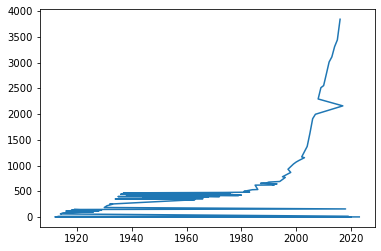

In [47]:
#Plots
import matplotlib.pyplot as plt
p = casts['year'].value_counts()
p.plot()
plt.show()

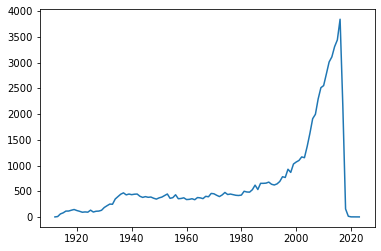

In [48]:
#plots
import matplotlib.pyplot as plt
p.sort_index().plot()#here index is 'year'
plt.show()

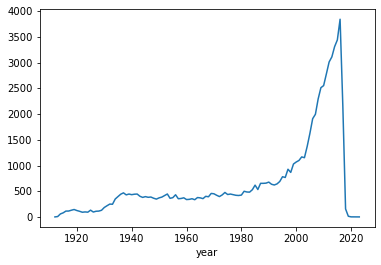

In [49]:
#groupby plotting
cg = casts.groupby(['year']).size()
cg.plot()
plt.show()

In [50]:
casts.groupby(['year']).n.max().head() #n.max(), n.min(), n.mean()
#maximum rating in year 1912 is 6

year
1912     6.0
1913    14.0
1914    39.0
1915    14.0
1916    35.0
Name: n, dtype: float64

In [51]:
# casts.YEAR.duplicated()

In [52]:
#to improve the performance
c = casts.set_index(['title'])#‘set_index’ can be used to create an index for the data. 
#‘.loc’ should be used for fast operations
c.loc['Macbeth']

,year,name,type,character,n
title,,,,,
Macbeth,2015,Darren Adamson,actor,Soldier,NaN
Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
Macbeth,2016,John Albasiny,actor,Doctor,NaN
Macbeth,1948,William Alland,actor,Second Murderer,18.0
Macbeth,1997,Stevie Allen,actor,Murderer,21.0
Macbeth,2014,Moyo Akand?,actress,Witch,NaN
Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0


In [53]:
#Q:How do I rename/change columns in a pandas DataFrame?
casts.rename(columns = {'title': 'TITLE','year':'YEAR','name': 'NAME'},inplace = True)
casts.columns

Index(['TITLE', 'YEAR', 'NAME', 'type', 'character', 'n'], dtype='object')

In [54]:
#change value in a cell
casts.loc[2,'YEAR']  =1980 #YEAR for index 2 changed from 2017 to 1980
casts

,TITLE,YEAR,NAME,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,1980,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.0
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,NaN
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.0
74999,Toxic Tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,NaN


In [55]:
casts.at[2,'YEAR'] # getting fast access to a scalar

1980

In [56]:
#case change
casts['TITLE'] = casts['TITLE'].str.lower()
#df_people['mail IDs'] = df_people['mail IDs'].apply(lambda x: x.upper())
casts

,TITLE,YEAR,NAME,type,character,n
0,closet monster,2015,Buffy #1,actor,Buffy 4,31.0
1,suuri illusioni,1985,Homo $,actor,Guests,22.0
2,battle of the sexes,1980,$hutter,actor,Bobby Riggs Fan,10.0
3,secret in their eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,steve jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
74996,mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.0
74997,the magician king,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,NaN
74998,festival of lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.0
74999,toxic tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,NaN


In [57]:
#case change
casts['character'] = casts['character'].apply(lambda x: x.upper())
casts

,TITLE,YEAR,NAME,type,character,n
0,closet monster,2015,Buffy #1,actor,BUFFY 4,31.0
1,suuri illusioni,1985,Homo $,actor,GUESTS,22.0
2,battle of the sexes,1980,$hutter,actor,BOBBY RIGGS FAN,10.0
3,secret in their eyes,2015,$hutter,actor,2002 DODGER FAN,NaN
4,steve jobs,2015,$hutter,actor,1988 OPERA HOUSE PATRON,NaN
...,...,...,...,...,...,...
74996,mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,POPI VOULKANIZATER,11.0
74997,the magician king,2004,Tiannah Anastassiades,actress,UNICYCLE RACE ATTENDANT,NaN
74998,festival of lights,2010,Zoe Anastassiou,actress,GUIDANCE COUNSELOR,20.0
74999,toxic tutu,2016,Zoe Anastassiou,actress,DEMON OF TOXICITY,NaN


In [58]:
# #find length of any individual column/data frame
casts['TITLE'].apply(len) # individual character length of each values of that column
#len(casts['TITLE']) # number of values in that specific column

0        14
1        15
2        19
3        20
4        10
         ..
74996    24
74997    17
74998    18
74999    10
75000    15
Name: TITLE, Length: 75001, dtype: int64

In [59]:
#casts.apply(pd.Series.min) # show all smallest words from each columns
casts.apply(lambda x: x.min())

TITLE        #1 serial killer
YEAR                     1912
NAME                  $hutter
type                    actor
character        AFFLICTED #1
n                         1.0
dtype: object

In [60]:
casts['YEAR'].unique() 

array([2015, 1985, 1980, 2009, 2014, 1998, 2000, 2016, 2017, 2010, 1997,
       1977, 2013, 2011, 2007, 1993, 1963, 2001, 2008, 1971, 1978, 1975,
       1996, 2005, 1992, 1995, 2006, 1914, 2002, 1994, 1957, 1960, 1958,
       1984, 2012, 1969, 1976, 1956, 1970, 1999, 1953, 1982, 1986, 2003,
       1983, 1931, 1968, 1987, 1989, 1988, 2019, 1950, 1954, 1948, 1917,
       1935, 1932, 1927, 1938, 1942, 1921, 1918, 1944, 1955, 1952, 1945,
       1981, 1939, 1940, 1949, 1947, 1943, 1991, 2004, 1962, 1979, 1930,
       1973, 1961, 1933, 1964, 1990, 1946, 1965, 2018, 1923, 1974, 1967,
       1936, 1929, 1972, 1966, 1959, 1926, 1951, 1941, 1937, 1934, 1922,
       1928, 1920, 1919, 1915, 1925, 1916, 2020, 1924, 1913, 1912, 2023],
      dtype=int64)

In [61]:
casts['YEAR'].nunique() 

110

In [62]:
#replace cells values i.e. Mapping ordinal features
casts_gender = casts['type'].map({'actor': 'Male', 'actress': 'Female'}) #dummy encoding way for categorical column
casts_gender

0          Male
1          Male
2          Male
3          Male
4          Male
          ...  
74996    Female
74997    Female
74998    Female
74999    Female
75000    Female
Name: type, Length: 75001, dtype: object

# Pivot Table

In [63]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [64]:
df.pivot(index='foo', columns='bar', values='baz') #both are same
# df.pivot(index='foo', columns='bar')['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [65]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [66]:
import numpy as np
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum, fill_value=0)
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6